In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df1=pd.read_csv('movies_imdb.csv')

In [3]:
df2=pd.read_csv('movies_imdb_more_info.csv')

In [4]:
df_all=pd.merge(df1,df2,on='imdbID',how='left')

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6661 entries, 0 to 6660
Data columns (total 18 columns):
movie                  6661 non-null object
year                   6661 non-null object
imdbID                 6661 non-null object
genre                  6661 non-null object
runtime                6661 non-null object
rating                 6661 non-null float64
metascore              6661 non-null float64
director               6661 non-null object
votes                  6661 non-null object
gross                  5501 non-null object
stars                  6658 non-null object
writer                 6657 non-null object
popularity             2755 non-null object
plot_keywords          6593 non-null object
languages              6657 non-null object
country                6661 non-null object
budget                 4552 non-null object
cum_worldwide_gross    6338 non-null object
dtypes: float64(2), object(16)
memory usage: 988.7+ KB


In [6]:
df_all.isna().sum()

movie                     0
year                      0
imdbID                    0
genre                     0
runtime                   0
rating                    0
metascore                 0
director                  0
votes                     0
gross                  1160
stars                     3
writer                    4
popularity             3906
plot_keywords            68
languages                 4
country                   0
budget                 2109
cum_worldwide_gross     323
dtype: int64

In [7]:
df_all.isna().sum()/df_all.shape[0]

movie                  0.000000
year                   0.000000
imdbID                 0.000000
genre                  0.000000
runtime                0.000000
rating                 0.000000
metascore              0.000000
director               0.000000
votes                  0.000000
gross                  0.174148
stars                  0.000450
writer                 0.000601
popularity             0.586398
plot_keywords          0.010209
languages              0.000601
country                0.000000
budget                 0.316619
cum_worldwide_gross    0.048491
dtype: float64

### Gross and cum_worldwide_gross

- as predicted: less missing values for 'cum_worldwide_gross', so we drop the 'gross' column

In [8]:
df_all.drop('gross',axis=1,inplace=True)

In [9]:
df_all[df_all.cum_worldwide_gross.isna()].head()

,movie,year,imdbID,genre,runtime,rating,metascore,director,votes,stars,writer,popularity,plot_keywords,languages,country,budget,cum_worldwide_gross
474,Bird Box,(2018),/title/tt2737304/,"\nDrama, Horror, Sci-Fi",124 min,6.6,51.0,Susanne Bier,"242,769","['Sandra Bullock', 'Trevante Rhodes', 'John Ma...",Eric Heisserer,363\n ( 80),"[' suicide', ' survival', ' invisible creature...",['English'],USA,NaN,NaN
843,Bright,(I) (2017),/title/tt5519340/,"\nAction, Adventure, Crime",117 min,6.4,29.0,David Ayer,"155,837","['Will Smith', 'Joel Edgerton', 'Noomi Rapace']",Max Landis,681\n ( 96),"[' orc', ' buddy movie', ' elf', ' magic', ' w...","['English', 'Spanish']",USA,"['90,000,000']",NaN
906,El Camino: Un film Breaking Bad,(2019),/title/tt9243946/,"\nAction, Drama",122 min,7.4,72.0,Vince Gilligan,"143,693","['Aaron Paul', 'Jonathan Banks', 'Matt Jones']",Vince Gilligan,238\n ( 29),"[' neo noir', ' happy ending', ' crystal meth'...",['English'],USA,NaN,NaN
1258,La ballade de Buster Scruggs,(2018),/title/tt6412452/,"\nComedy, Drama, Musical",133 min,7.3,79.0,Ethan Coen,"101,228","['Tim Blake Nelson', 'Willie Watson', 'Clancy ...",Joel Coen,531\n ( 13),"[' episodic structure', ' cowboy', ' new mexic...","['English', 'French']",USA,NaN,NaN
1437,Triple frontière,(2019),/title/tt1488606/,"\nAction, Adventure, Crime",125 min,6.5,61.0,J.C. Chandor,"88,333","['Ben Affleck', 'Oscar Isaac', 'Charlie Hunnam']",Mark Boal,221\n ( 123),"[' greed', ' theft', ' brazil', ' boat', ' cha...","['English', 'Spanish', 'Portuguese']",USA,NaN,NaN


- seems to be mostly Netflix movies 
- we can drop the movies with missing values

In [10]:
df_all.dropna(subset=['cum_worldwide_gross'], inplace=True)

In [11]:
df_all.shape

(6338, 17)

In [12]:
df_all.isna().sum()

movie                     0
year                      0
imdbID                    0
genre                     0
runtime                   0
rating                    0
metascore                 0
director                  0
votes                     0
stars                     2
writer                    3
popularity             3679
plot_keywords            54
languages                 4
country                   0
budget                 1867
cum_worldwide_gross       0
dtype: int64

### popularity

- too many missing values: drop the column

In [13]:
df_all.drop('popularity', axis=1,inplace=True)

### budget

- too many missing values: drop the column

In [14]:
df_all.drop('budget', axis=1,inplace=True)

### stars

1. dealing with missing values

In [15]:
df_all[df_all.stars.isna()]

,movie,year,imdbID,genre,runtime,rating,metascore,director,votes,stars,writer,plot_keywords,languages,country,cum_worldwide_gross
1674,All Is Lost,(2013),/title/tt2017038/,"\nAdventure, Drama",106 min,6.9,87.0,J.C. Chandor,"72,822",NaN,J.C. Chandor,"[' one man film', ' storm', ' boat', ' sea', '...",['English'],USA,"['13,627,519']"
4155,Taxi Téhéran,(III) (2015),/title/tt4359416/,"\nComedy, Drama",82 min,7.3,91.0,Jafar Panahi,"12,417",NaN,Jafar Panahi,"[' pseudo documentary', ' taxi driver', ' dire...",['Persian'],Iran,"['3,906,227']"


- 2 movies with only 1 star
- add info by hand

In [16]:
df_all.loc[1674,'stars']=['Robert Redford']

In [17]:
df_all.loc[4155,'stars']=['Jafar Panahi']

In [18]:
df_all.stars.isna().sum()

0

2. categorizing

- we need to extract the most frequent actors 

In [19]:
df_all.stars.head()

0    ['Christian Bale', 'Heath Ledger', 'Aaron Eckh...
1    ['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...
2     ['Elijah Wood', 'Ian McKellen', 'Orlando Bloom']
3    ['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...
4     ['Christian Bale', 'Tom Hardy', 'Anne Hathaway']
Name: stars, dtype: object

In [20]:
df_all.stars[0]

"['Christian Bale', 'Heath Ledger', 'Aaron Eckhart']"

In [21]:
# the format is a string, not a list

In [22]:
df_all.stars=df_all.stars.apply(lambda x: x.split(','))

In [23]:
df_all.stars=df_all.stars.apply(lambda lst: [x.strip('[').strip(']').strip().strip("\'") for x in lst])

In [24]:
df_all.stars.head()

0        [Christian Bale, Heath Ledger, Aaron Eckhart]
1    [Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...
2           [Elijah Wood, Ian McKellen, Orlando Bloom]
3         [Elijah Wood, Viggo Mortensen, Ian McKellen]
4           [Christian Bale, Tom Hardy, Anne Hathaway]
Name: stars, dtype: object

In [25]:
# getting a list of all stars for each movie
from itertools import chain
stars_list = list(chain.from_iterable(df_all.stars))

In [26]:
# getting a dictionary with key = actors' name, value = frequency
from collections import Counter
stars_dict = Counter(stars_list)

In [27]:
stars_dict.most_common(25)

[('Nicolas Cage', 47),
 ('Samuel L. Jackson', 41),
 ('Robert De Niro', 37),
 ('Nicole Kidman', 36),
 ('Ewan McGregor', 35),
 ('Morgan Freeman', 35),
 ('Bruce Willis', 34),
 ('Mark Wahlberg', 33),
 ('James Franco', 33),
 ('Julianne Moore', 33),
 ('Owen Wilson', 33),
 ('Matt Damon', 32),
 ('Ryan Reynolds', 32),
 ('Liam Neeson', 32),
 ('Naomi Watts', 32),
 ('Scarlett Johansson', 31),
 ('Colin Farrell', 31),
 ('Dwayne Johnson', 31),
 ('John Cusack', 31),
 ('Matthew McConaughey', 30),
 ('Johnny Depp', 30),
 ('Charlize Theron', 30),
 ('Willem Dafoe', 30),
 ('Cate Blanchett', 30),
 ('Ethan Hawke', 30)]

In [28]:
# we only take into account the 15 most frequent stars (>=32)

In [29]:
stars_15freq = [star[0] for star in stars_dict.most_common(15)]  

In [30]:
stars_15freq

['Nicolas Cage',
 'Samuel L. Jackson',
 'Robert De Niro',
 'Nicole Kidman',
 'Ewan McGregor',
 'Morgan Freeman',
 'Bruce Willis',
 'Mark Wahlberg',
 'James Franco',
 'Julianne Moore',
 'Owen Wilson',
 'Matt Damon',
 'Ryan Reynolds',
 'Liam Neeson',
 'Naomi Watts']

In [31]:
# there are 3 stars in most of the movies. there can be more than one of the 15 most frequent for 1 movie, so we create "dummie" columns for all 15 most frequent stars (but they are not mutually exclusive)

In [32]:
for star in stars_15freq:
    df_all['star_'+star]=df_all.stars.apply(lambda x: 1 if star in x else 0)

In [33]:
df_all.columns

Index(['movie', 'year', 'imdbID', 'genre', 'runtime', 'rating', 'metascore',
       'director', 'votes', 'stars', 'writer', 'plot_keywords', 'languages',
       'country', 'cum_worldwide_gross', 'star_Nicolas Cage',
       'star_Samuel L. Jackson', 'star_Robert De Niro', 'star_Nicole Kidman',
       'star_Ewan McGregor', 'star_Morgan Freeman', 'star_Bruce Willis',
       'star_Mark Wahlberg', 'star_James Franco', 'star_Julianne Moore',
       'star_Owen Wilson', 'star_Matt Damon', 'star_Ryan Reynolds',
       'star_Liam Neeson', 'star_Naomi Watts'],
      dtype='object')

### writer

1. dealing with missing values

In [34]:
df_all[df_all.writer.isna()]

,movie,year,imdbID,genre,runtime,rating,metascore,director,votes,stars,...,star_Morgan Freeman,star_Bruce Willis,star_Mark Wahlberg,star_James Franco,star_Julianne Moore,star_Owen Wilson,star_Matt Damon,star_Ryan Reynolds,star_Liam Neeson,star_Naomi Watts
3386,9 Songs,(2004),/title/tt0411705/,"\nDrama, Music, Romance",71 min,4.8,43.0,Michael Winterbottom,"20,690","[""Kieran O'Brien"", Margo Stilley, Black Rebel ...",...,0,0,0,0,0,0,0,0,0,0
5422,Fasle kargadan,(2012),/title/tt1850419/,"\nDrama, History, Thriller",88 min,6.5,66.0,Bahman Ghobadi,"5,674","[Behrouz Vossoughi, Monica Bellucci, Yilmaz Er...",...,0,0,0,0,0,0,0,0,0,0
5859,The Trip to Spain,(2017),/title/tt6193424/,"\nComedy, Drama",108 min,6.6,66.0,Michael Winterbottom,"4,337","[Steve Coogan, Rob Brydon, Rebecca Johnson]",...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_all.writer.fillna('no_writer', inplace=True)

2. get the most frequent writers and categorize them

In [36]:
writers_list=df_all.writer.to_list()

In [37]:
writer_dict = Counter(writers_list)

In [38]:
writer_dict.most_common(25)

[('Tyler Perry', 21),
 ('Woody Allen', 19),
 ('Luc Besson', 18),
 ('Steven Knight', 12),
 ('François Ozon', 11),
 ('Joel Coen', 10),
 ('Jon Lucas', 10),
 ('Ehren Kruger', 10),
 ('Leigh Whannell', 10),
 ('Lars von Trier', 10),
 ('Paul Laverty', 10),
 ('M. Night Shyamalan', 9),
 ('John Logan', 9),
 ('Robert Rodriguez', 9),
 ('Olivier Assayas', 9),
 ('Christopher Markus', 8),
 ('Dan Fogelman', 8),
 ('Mark Bomback', 8),
 ('Peter Morgan', 8),
 ('Brian Helgeland', 8),
 ('Allan Loeb', 8),
 ('Patrick Melton', 8),
 ('Michael Haneke', 8),
 ('Anders Thomas Jensen', 8),
 ('William Monahan', 7)]

In [39]:
# we only take into account the 15 most frequent writers (>=9)

In [40]:
writer_15freq = [writer[0] for writer in writer_dict.most_common(15)] 

In [41]:
# only 1 writer per movie: we create a column 'writer_category' where we leave the name of the writer if in the most frequent, and else put 'other'
# this column will be transformed into dummies for models that need it

In [42]:
df_all['writer_category']=df_all.writer.apply(lambda x: x if x in writer_15freq else 'other')

In [43]:
df_all.shape

(6338, 31)

### languages

In [44]:
df_all.languages.sample(5)

2697    ['Japanese', 'Cantonese', 'English']
3907                             ['English']
1316                             ['English']
4345                  ['English', 'Italian']
4619                              ['Danish']
Name: languages, dtype: object

In [45]:
df_all[df_all.languages.isna()].country

5178          USA
5303          USA
6368    Singapore
6609          USA
Name: country, dtype: object

In [46]:
# these 4 movies are in english

In [47]:
df_all.languages.fillna('English', inplace=True)

In [48]:
df_all.languages[0]

"['English', 'Mandarin']"

In [49]:
# the format is a string, not a list

In [50]:
df_all.languages=df_all.languages.apply(lambda x: x.split(','))

In [51]:
df_all.languages=df_all.languages.apply(lambda lst: [x.strip('[').strip(']').strip().strip("\'") for x in lst])

In [52]:
df_all.languages.head()

0                         [English, Mandarin]
1                 [English, Japanese, French]
2                         [English, Sindarin]
3    [English, Quenya, Old English, Sindarin]
4                           [English, Arabic]
Name: languages, dtype: object

In [53]:
df_all.languages[0]

['English', 'Mandarin']

In [54]:
# getting a list of all languages for each movie
from itertools import chain
languages_list = list(chain.from_iterable(df_all.languages))

In [55]:
# getting a dictionary with key = actors' name, value = frequency
from collections import Counter
languages_dict = Counter(languages_list)

In [56]:
languages_dict.most_common(25)

[('English', 5637),
 ('French', 856),
 ('Spanish', 749),
 ('German', 429),
 ('Italian', 285),
 ('Japanese', 273),
 ('Russian', 273),
 ('Mandarin', 220),
 ('Arabic', 181),
 ('Cantonese', 94),
 ('Hebrew', 94),
 ('Korean', 93),
 ('Hindi', 88),
 ('Latin', 86),
 ('Portuguese', 72),
 ('Swedish', 72),
 ('Danish', 63),
 ('Turkish', 51),
 ('Ukrainian', 51),
 ('Persian', 48),
 ('Greek', 48),
 ('Chinese', 47),
 ('Norwegian', 46),
 ('Romanian', 43),
 ('Polish', 42)]

In [57]:
# we only take into account the 9 most frequent languages (>=181)

In [58]:
language_9freq = [language[0] for language in languages_dict.most_common(9)]  

In [59]:
language_9freq

['English',
 'French',
 'Spanish',
 'German',
 'Italian',
 'Japanese',
 'Russian',
 'Mandarin',
 'Arabic']

In [60]:
# there are more than 1 language in most movies. there can be more than one of the 9 most frequent for 1 movie, so we create "dummies" columns for all 9 most frequent languages (but they are not mutually exclusive)

In [61]:
for language in language_9freq:
    df_all['language_'+language]=df_all.languages.apply(lambda x: 1 if language in x else 0)

In [62]:
df_all.columns

Index(['movie', 'year', 'imdbID', 'genre', 'runtime', 'rating', 'metascore',
       'director', 'votes', 'stars', 'writer', 'plot_keywords', 'languages',
       'country', 'cum_worldwide_gross', 'star_Nicolas Cage',
       'star_Samuel L. Jackson', 'star_Robert De Niro', 'star_Nicole Kidman',
       'star_Ewan McGregor', 'star_Morgan Freeman', 'star_Bruce Willis',
       'star_Mark Wahlberg', 'star_James Franco', 'star_Julianne Moore',
       'star_Owen Wilson', 'star_Matt Damon', 'star_Ryan Reynolds',
       'star_Liam Neeson', 'star_Naomi Watts', 'writer_category',
       'language_English', 'language_French', 'language_Spanish',
       'language_German', 'language_Italian', 'language_Japanese',
       'language_Russian', 'language_Mandarin', 'language_Arabic'],
      dtype='object')

### plot_keywords

In [63]:
df_all.plot_keywords.isna().sum()

54

In [64]:
#only a few movies with no keyword: we replace with an empty string: we will only consider the most frequent keywords
df_all.plot_keywords=df_all.plot_keywords.fillna('')

In [65]:
# we will deal with the keyword frequency later

In [66]:
df_all.isna().sum()

movie                     0
year                      0
imdbID                    0
genre                     0
runtime                   0
rating                    0
metascore                 0
director                  0
votes                     0
stars                     0
writer                    0
plot_keywords             0
languages                 0
country                   0
cum_worldwide_gross       0
star_Nicolas Cage         0
star_Samuel L. Jackson    0
star_Robert De Niro       0
star_Nicole Kidman        0
star_Ewan McGregor        0
star_Morgan Freeman       0
star_Bruce Willis         0
star_Mark Wahlberg        0
star_James Franco         0
star_Julianne Moore       0
star_Owen Wilson          0
star_Matt Damon           0
star_Ryan Reynolds        0
star_Liam Neeson          0
star_Naomi Watts          0
writer_category           0
language_English          0
language_French           0
language_Spanish          0
language_German           0
language_Italian    

## Cleaning

### Year

1. remove parenthesis and transform string to integer

In [67]:
df_all.year.sample(10)

1678    (2003)
151     (2002)
4525    (2015)
2987    (2003)
6531    (2012)
6126    (2015)
997     (2003)
3640    (2018)
4883    (2012)
2727    (2007)
Name: year, dtype: object

In [68]:
df_all.year=df_all.year.apply(lambda x: int(x[-5:-1]))

2. for the analysis, we transform the year of the movie into the 'age' of the movie:

In [69]:
df_all['age']=2020-df_all.year

### genre

- making a list of all genres represented
- create column for each genre
- put 1 in all columns corresponding to the genres in the list for each movie (row)

In [70]:
df_all.genre.sample(10)

4730          \nComedy, Drama, Mystery            
397                           \nComedy            
2459    \nAnimation, Adventure, Comedy            
3767        \nAnimation, Comedy, Drama            
3013            \nComedy, Crime, Drama            
980                  \nComedy, Romance            
699                   \nDrama, Romance            
4795                          \nComedy            
4242          \nAction, Comedy, Horror            
2995            \nAction, Crime, Drama            
Name: genre, dtype: object

In [71]:
df_all.genre=df_all.genre.apply(lambda x: x.strip().split(','))

In [72]:
df_all.genre=df_all.genre.apply(lambda lst: [x.strip() for x in lst])

In [73]:
from itertools import chain
genres = list(set(chain.from_iterable(df_all.genre)))

In [74]:
for cat in genres:
    df_all['genre_'+cat]=df_all.genre.apply(lambda x: 1 if cat in x else 0)

In [75]:
df_all.columns

Index(['movie', 'year', 'imdbID', 'genre', 'runtime', 'rating', 'metascore',
       'director', 'votes', 'stars', 'writer', 'plot_keywords', 'languages',
       'country', 'cum_worldwide_gross', 'star_Nicolas Cage',
       'star_Samuel L. Jackson', 'star_Robert De Niro', 'star_Nicole Kidman',
       'star_Ewan McGregor', 'star_Morgan Freeman', 'star_Bruce Willis',
       'star_Mark Wahlberg', 'star_James Franco', 'star_Julianne Moore',
       'star_Owen Wilson', 'star_Matt Damon', 'star_Ryan Reynolds',
       'star_Liam Neeson', 'star_Naomi Watts', 'writer_category',
       'language_English', 'language_French', 'language_Spanish',
       'language_German', 'language_Italian', 'language_Japanese',
       'language_Russian', 'language_Mandarin', 'language_Arabic', 'age',
       'genre_Mystery', 'genre_Musical', 'genre_Adult', 'genre_Comedy',
       'genre_Drama', 'genre_War', 'genre_Horror', 'genre_Sport',
       'genre_Action', 'genre_Crime', 'genre_Animation', 'genre_Sci-Fi',
       '

### runtime

- needs to remove 'min'

In [76]:
df_all.runtime.sample(10)

5391    107 min
6387     97 min
865      93 min
3796    124 min
4059     95 min
1139     86 min
4706    107 min
220     115 min
5933    105 min
98      116 min
Name: runtime, dtype: object

In [77]:
df_all.runtime=df_all.runtime.apply(lambda x: int(x[:-4]))

In [78]:
df_all.runtime.sample(10)

751     132
1008    104
1171     83
4902    118
1980     98
3485    110
1092    131
5045    103
3751     93
2167    123
Name: runtime, dtype: int64

### rating
- will be our target

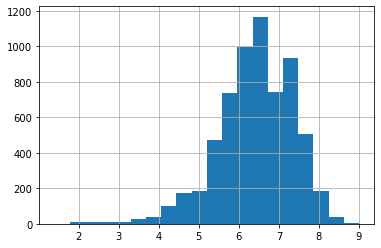

In [79]:
df_all.rating.hist(bins=20)

In [80]:
df_all.rating.describe()

count    6338.000000
mean        6.406201
std         0.940605
min         1.400000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.000000
Name: rating, dtype: float64

In [81]:
# distribution is not Normal (more high rating)

### metascore

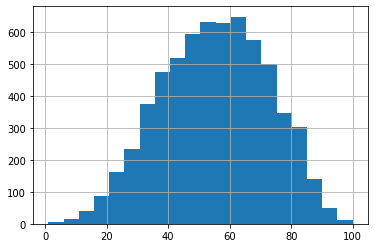

In [82]:
df_all.metascore.hist(bins=20)

In [83]:
df_all.metascore.describe()

count    6338.000000
mean       55.245188
std        17.557296
min         1.000000
25%        43.000000
50%        56.000000
75%        68.000000
max       100.000000
Name: metascore, dtype: float64

In [84]:
# metascore seems normally distributed
# we'll normalize it by dividing by 100 to have a value between 0 and 1

In [85]:
df_all.metascore=df_all.metascore/100

### director

- get the most frequent directors and categorize them

In [86]:
directors_list=df_all.director.to_list()

In [87]:
director_dict = Counter(directors_list)

In [88]:
director_dict.most_common(25)

[('Tyler Perry', 20),
 ('Woody Allen', 19),
 ('Steven Soderbergh', 18),
 ('Clint Eastwood', 17),
 ('Ridley Scott', 15),
 ('Steven Spielberg', 14),
 ('Richard Linklater', 14),
 ('David Gordon Green', 13),
 ('François Ozon', 13),
 ('Michael Winterbottom', 13),
 ('Ron Howard', 12),
 ('Tim Burton', 11),
 ('Antoine Fuqua', 11),
 ('Shawn Levy', 11),
 ('Lasse Hallström', 11),
 ('Stephen Frears', 11),
 ('Danny Boyle', 10),
 ('Guy Ritchie', 10),
 ('Todd Phillips', 10),
 ('Michael Bay', 10),
 ('Marc Forster', 10),
 ('M. Night Shyamalan', 10),
 ('Robert Rodriguez', 10),
 ('Yimou Zhang', 10),
 ('Gus Van Sant', 10)]

In [89]:
# we only take into account the 16 most frequent languages (>10)

In [90]:
director_16freq = [director[0] for director in director_dict.most_common(16)] 

In [91]:
director_16freq

['Tyler Perry',
 'Woody Allen',
 'Steven Soderbergh',
 'Clint Eastwood',
 'Ridley Scott',
 'Steven Spielberg',
 'Richard Linklater',
 'David Gordon Green',
 'François Ozon',
 'Michael Winterbottom',
 'Ron Howard',
 'Tim Burton',
 'Antoine Fuqua',
 'Shawn Levy',
 'Lasse Hallström',
 'Stephen Frears']

In [92]:
# only 1 director per movie: we create a column 'director_category' where we leave the name of the director if in the most frequent, and else put 'other'
# this column will be used as is in models like decision tree , and can be transformed into dummies for models that need it 

In [93]:
df_all['director_category']=df_all.director.apply(lambda x: x if x in director_16freq else 'other')

In [94]:
df_all.shape

(6338, 63)

### votes

In [95]:
df_all.votes.head()

0    2,161,024
1    1,909,234
2    1,561,138
3    1,549,252
4    1,431,808
Name: votes, dtype: object

- need to remove the commas
- transform into int

In [96]:
df_all.votes=df_all.votes.str.replace(',','').astype(int)

In [97]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6338 entries, 0 to 6660
Data columns (total 63 columns):
movie                     6338 non-null object
year                      6338 non-null int64
imdbID                    6338 non-null object
genre                     6338 non-null object
runtime                   6338 non-null int64
rating                    6338 non-null float64
metascore                 6338 non-null float64
director                  6338 non-null object
votes                     6338 non-null int32
stars                     6338 non-null object
writer                    6338 non-null object
plot_keywords             6338 non-null object
languages                 6338 non-null object
country                   6338 non-null object
cum_worldwide_gross       6338 non-null object
star_Nicolas Cage         6338 non-null int64
star_Samuel L. Jackson    6338 non-null int64
star_Robert De Niro       6338 non-null int64
star_Nicole Kidman        6338 non-null int64
star_

### country

In [98]:
df_all.country.sample(10)

1392       USA
6614       USA
1746        UK
143        USA
3391    Canada
2767       USA
3192       USA
924        USA
3496    France
4494     China
Name: country, dtype: object

In [99]:
country_list=df_all.country.to_list()

In [100]:
country_dict = Counter(country_list)

In [101]:
country_dict.most_common(25)

[('USA', 3665),
 ('UK', 703),
 ('France', 383),
 ('Canada', 205),
 ('Germany', 176),
 ('Japan', 100),
 ('Australia', 92),
 ('Spain', 88),
 ('China', 86),
 ('Italy', 61),
 ('South Korea', 59),
 ('Denmark', 54),
 ('Ireland', 51),
 ('Hong Kong', 49),
 ('India', 45),
 ('Mexico', 41),
 ('Belgium', 38),
 ('Sweden', 32),
 ('Norway', 31),
 ('Argentina', 27),
 ('Russia', 23),
 ('Israel', 23),
 ('New Zealand', 21),
 ('Brazil', 17),
 ('Iran', 16)]

In [102]:
# we only take into account the 15 most frequent countries (>=45)

In [103]:
country_15freq = [country[0] for country in country_dict.most_common(15)] 

In [104]:
country_15freq

['USA',
 'UK',
 'France',
 'Canada',
 'Germany',
 'Japan',
 'Australia',
 'Spain',
 'China',
 'Italy',
 'South Korea',
 'Denmark',
 'Ireland',
 'Hong Kong',
 'India']

In [105]:
# only 1 country per movie: we create a column 'country_category' where we leave the country if in the most frequent, and else put 'other'
# this column will be transformed into dummies for models that need it 

In [106]:
df_all['country_category']=df_all.country.apply(lambda x: x if x in country_15freq else 'other')

In [107]:
df_all.shape

(6338, 64)

### cum_worldwide_gross

In [108]:
df_all.cum_worldwide_gross.sample(10)

365      ['99,378,985']
3486         ['25,517']
1474     ['95,714,875']
5212      ['1,326,639']
5407      ['1,498,262']
333     ['856,085,151']
2488     ['39,667,665']
6030        ['973,539']
3014     ['19,770,475']
567     ['240,797,623']
Name: cum_worldwide_gross, dtype: object

In [109]:
df_all.cum_worldwide_gross[0]

"['1,004,934,033']"

In [110]:
# the values are strings and not lists

In [111]:
df_all.cum_worldwide_gross.value_counts().head()

[]               4
['18,000']       2
['1,474,471']    2
['6,147']        2
['143,121']      2
Name: cum_worldwide_gross, dtype: int64

In [112]:
df_all[df_all.cum_worldwide_gross=="[]"]

,movie,year,imdbID,genre,runtime,rating,metascore,director,votes,stars,...,genre_Western,genre_Fantasy,genre_History,genre_Thriller,genre_Biography,genre_Adventure,genre_Music,genre_Romance,director_category,country_category
2110,The Fundamentals of Caring,2016,/title/tt2452386/,"[Comedy, Drama]",97,7.3,0.55,Rob Burnett,51559,"[Craig Roberts, Paul Rudd, Selena Gomez]",...,0,0,0,0,0,0,0,0,other,USA
4538,Stage Beauty,2004,/title/tt0368658/,[Drama],106,7.1,0.64,Richard Eyre,9659,"[Billy Crudup, Claire Danes, Rupert Everett]",...,0,0,0,0,0,0,0,0,other,UK
6036,Daughter of the Wolf,2019,/title/tt7615052/,"[Action, Thriller]",88,5.6,0.36,David Hackl,3907,"[Gina Carano, Richard Dreyfuss, Brendan Fehr]",...,0,0,0,1,0,0,0,0,other,Canada
6045,Shottas,2002,/title/tt0281190/,"[Action, Crime, Drama]",95,6.2,0.36,Cess Silvera,3879,"[Ky-Mani Marley, Spragga Benz, Louie Rankin]",...,0,0,0,0,0,0,0,0,other,USA


- 3 movies have no 'cumulative worldwide gross' value
- 1 movie has a value that has not been scraped by mistake

In [113]:
df_all.loc[4538,'cum_worldwide_gross']='2,307,092'

In [114]:
df_all.loc[2110,'cum_worldwide_gross']=None
df_all.loc[6036,'cum_worldwide_gross']=None
df_all.loc[6045,'cum_worldwide_gross']=None

In [115]:
df_all.dropna(subset=['cum_worldwide_gross'],inplace=True)

In [116]:
df_all.cum_worldwide_gross=df_all.cum_worldwide_gross.apply(lambda x: int(x.strip('[').strip(']').strip("'").replace(',','')))

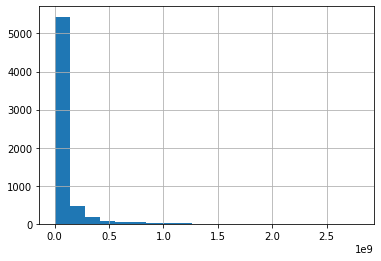

In [117]:
df_all.cum_worldwide_gross.hist(bins=20)

In [118]:
# Poisson distribution as often when it is about money: we must take the log

In [119]:
df_all['log_cum_worldwide_gross']=df_all.cum_worldwide_gross.apply(np.log)

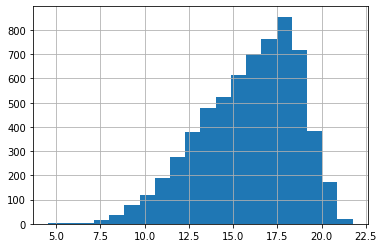

In [120]:
df_all.log_cum_worldwide_gross.hist(bins=20)

In [121]:
df_all.log_cum_worldwide_gross.describe()

count    6335.000000
mean       15.882624
std         2.739749
min         4.553877
25%        14.021656
50%        16.282271
75%        18.022586
max        21.752099
Name: log_cum_worldwide_gross, dtype: float64

NB: we will need to use minmaxscaler

In [122]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 0 to 6660
Data columns (total 65 columns):
movie                      6335 non-null object
year                       6335 non-null int64
imdbID                     6335 non-null object
genre                      6335 non-null object
runtime                    6335 non-null int64
rating                     6335 non-null float64
metascore                  6335 non-null float64
director                   6335 non-null object
votes                      6335 non-null int32
stars                      6335 non-null object
writer                     6335 non-null object
plot_keywords              6335 non-null object
languages                  6335 non-null object
country                    6335 non-null object
cum_worldwide_gross        6335 non-null int64
star_Nicolas Cage          6335 non-null int64
star_Samuel L. Jackson     6335 non-null int64
star_Robert De Niro        6335 non-null int64
star_Nicole Kidman         6335 no

### plot_keywords (2)

In [123]:
df_all.plot_keywords.sample(5)

255     [' cambridge university', ' husband wife relat...
3595    [' watching tv', ' love', ' neighbor', ' money...
4312    [' bank', ' bank robbery', ' sister sister rel...
3729    [' male nudity', ' voyeur', ' threesome', ' re...
3389    [' philippines', ' rescue mission', ' japanese...
Name: plot_keywords, dtype: object

In [124]:
df_all.plot_keywords[0]

"[' dc comics', ' joker', ' psychopath', ' clown', ' criminal mastermind']"

In [125]:
# the values are strings not lists

In [126]:
df_all.plot_keywords=df_all.plot_keywords.apply(lambda x: x.split(','))

In [127]:
df_all.plot_keywords=df_all.plot_keywords.apply(lambda lst: [x.strip('[').strip(']').strip().strip("\'").strip() for x in lst])

In [128]:
df_all.plot_keywords[0]

['dc comics', 'joker', 'psychopath', 'clown', 'criminal mastermind']

In [129]:
plot_keywords_list = list(chain.from_iterable(df_all.plot_keywords))

In [130]:
test=set(plot_keywords_list)

In [131]:
[x for x in test if 'title' in x][:10]

['title written by female',
 'sport in title',
 'place name in title',
 'dollar sign in title',
 'apostrophe in title',
 'alliterative title',
 'first person title',
 'family character name in title',
 'cgi animal in live action title',
 'colour in title']

In [132]:
# keywords with 'title' in do not caracterize well the plot 

In [133]:
[x for x in test if 'nudity' in x][:10]

['male rear nudity',
 'public nudity',
 'female full rear nudity',
 'brief male full frontal nudity',
 'rear nudity',
 'full frontal nudity',
 'female explicit nudity',
 'male nudity',
 'female rear nudity',
 'partial female nudity']

In [134]:
[x for x in test if 'sex' in x][:10]

['sex addiction',
 'caught having sex',
 'falling asleep during sex',
 'interracial sex',
 'sex in a toilet',
 'sex in hotel room',
 'awkward sex',
 'sexual abuse',
 'inviting sexual advances',
 'sex talk']

In [135]:
[x for x in test if 'bare ' in x][:10]

['bare chested boy',
 'bare chested male bondage',
 'bare ass',
 'bare midriff',
 'bare breasts',
 'woman with a bare midriff',
 'bare butt',
 'camera shot of bare feet',
 'bare bottom',
 '" woman\'s bare butt"']

In [136]:
# we need to simplify some of the keywords

In [137]:
def simplify_keywords(lst):
    lst2=[]
    for k in lst:
        if 'sex' in k:
            lst2.append('sex')
        elif 'nudity' in k:
            lst2.append('nudity')
        elif 'bare ' in k:
            lst2.append('nudity')
        elif 'title' not in k:
            lst2.append(k)
    lst2=list(set(lst2)) # no need to take into account the same keyword twice for the same movie
    return lst2

In [138]:
df_all['keywords_simple']=df_all.plot_keywords.apply(simplify_keywords)

In [139]:
keywords_list = list(chain.from_iterable(df_all.keywords_simple))

In [140]:
keywords_dict = Counter(keywords_list)

In [141]:
keywords_dict.most_common(20)

[('nudity', 616),
 ('sex', 507),
 ('f rated', 123),
 ('murder', 113),
 ('love', 88),
 ('female protagonist', 86),
 ('friendship', 83),
 ('revenge', 81),
 ('police', 80),
 ('new york city', 79),
 ('sequel', 78),
 ('father son relationship', 73),
 ('death', 72),
 ('dog', 70),
 ('high school', 66),
 ('father daughter relationship', 66),
 ('violence', 65),
 ('male objectification', 64),
 ('friend', 64),
 ('based on true story', 60)]

In [142]:
# we only take into account the 11 most frequent keywords (>=78)

In [143]:
keyword_11freq = [keywd[0] for keywd in keywords_dict.most_common(11)] 

In [144]:
for keywd in keyword_11freq:
    df_all['k_'+keywd]=df_all.keywords_simple.apply(lambda x: 1 if keywd in x else 0)

In [145]:
df_all.shape

(6335, 77)

In [146]:
df_all.to_csv('movies_imdb_clean.csv', index=False)